
# **<font color = 'geen'> Lab TASK-05 </font>**

- Name `Pankaj Mahanta`
- ID `213902002`
- Section `213D4`

# **Implement the Apriori algorithm using various other support thresholds in four (4) other datasets and record**

# **Introduction**

The Apriori algorithm is a fundamental technique in association rule mining, widely used for discovering frequent itemsets in large datasets. By applying various support thresholds, we can analyze how the frequency of itemsets changes and determine optimal values for effective rule generation. This experiment aims to explore the impact of different support thresholds on the Apriori algorithm and evaluate its performance in identifying significant associations within the data.



## **Objectives/Aim**
The primary objective of this lab is to explore and apply various data processing and visualization techniques and Apriori Algorithm to analyze datasets effectively. The key goals include:
1. To understand the Apriori algorithm and its application in association rule mining.
2. To analyze how different support thresholds affect the generation of frequent itemsets.
3. To implement the Apriori algorithm on a dataset and extract meaningful association rules.
4. To evaluate the performance of Apriori under varying support values.
5. To determine the optimal threshold for extracting valuable rules.
6. To visualize the impact of support values on the number of generated itemsets.
7. To compare the results and discuss the trade-offs between support values and rule significance.

---

## **Procedure / Analysis / Design**
1. **Dataset Selection**  
   - Choose a dataset containing NULL and garbage values from Kaggle or any other source.  
   - If necessary, manually introduce inconsistencies for demonstration purposes.  

2. **Data Cleaning Steps**  
   - Identify and handle missing values using different strategies (drop, mean/mode/median imputation, forward fill, etc.).  
   - Detect and replace garbage values in categorical and numerical columns.  

3. **Data Visualization Techniques**  
   - **Missing Values Visualization:** Heatmaps, bar charts.  
   - **Data Distribution:** Histograms, box plots, KDE plots.  
   - **Outlier Detection:** Box plots, scatter plots.  
   - **Correlation Analysis:** Heatmaps, pair plots.  
   - **Categorical Data Representation:** Bar plots, count plots.  

4. **Effect of Data Visualization on Understanding Data**  
   - Compare dataset characteristics before and after preprocessing using different visualization techniques.


5. **Target**
- **Select a dataset suitable for association rule mining.**

- **Preprocess the dataset by converting transactions into a format suitable for the Apriori algorithm.**

- **Define multiple support threshold values for experimentation.**

- **Apply the Apriori algorithm iteratively for each support threshold.**

- **Extract frequent itemsets and association rules for each case.**

- **Record and compare the results based on different thresholds.**

- **Visualize and analyze the impact of support values on rule generation.**

## **Implementation**
### Algorithm:

1. **Initialize Parameters:** Define the dataset and set different support threshold values.
2. **Generate Frequent 1-itemsets:** Identify itemsets that meet the minimum support.
3. **Candidate Generation:** Generate candidate (k+1)-itemsets from k-itemsets.
4. **Support Pruning:** Filter itemsets that meet the support threshold.
5. **Repeat Steps 3-4:** Continue until no new frequent itemsets can be generated.
6. **Generate Association Rules:** Use frequent itemsets to derive association rules.
7. **Evaluate and Compare Results:** Compare itemsets generated at different support values.

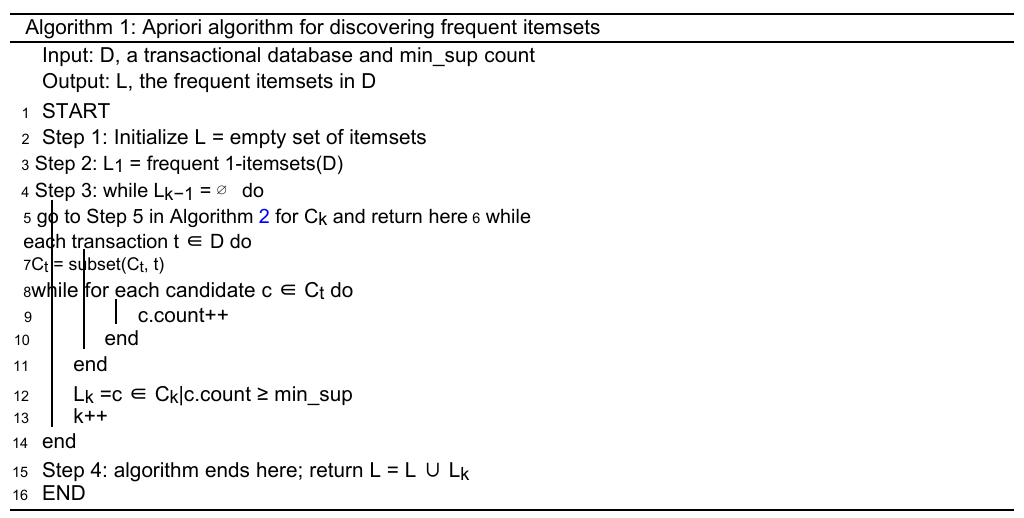


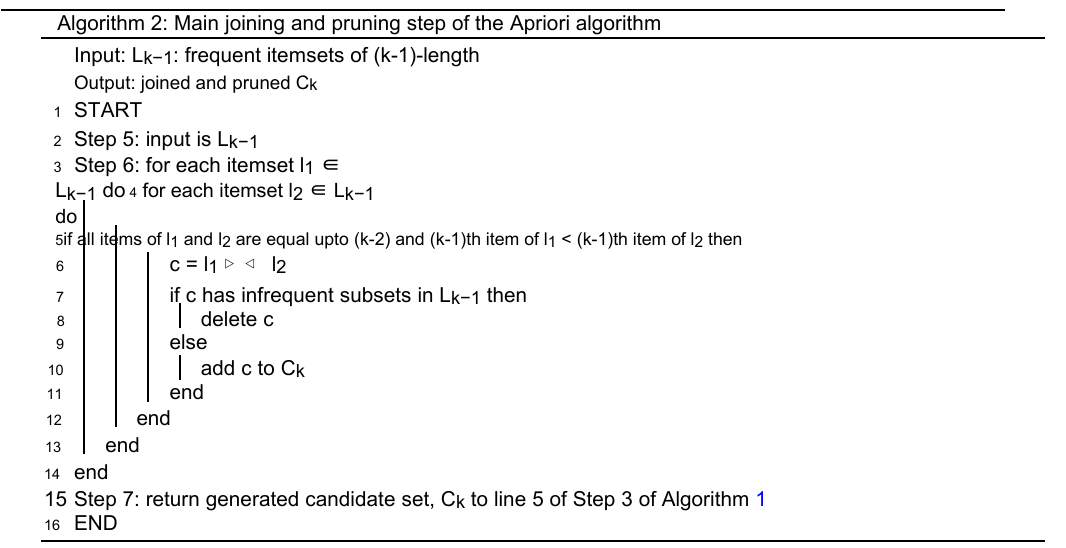

## **<font color = 'geen'> Import Library </font>**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **<font color = 'geen'> Loading Dataset </font>**

## DATA SET - 01 (website Traffic)

In [ ]:
pip install mlxtend

In [2]:
from mlxtend.frequent_patterns import apriori as ap
from mlxtend.frequent_patterns import association_rules as ap_r

In [3]:
dt1 = pd.read_csv('website_traffic.csv')
dt1.head()

,SessionID,UserID,PageVisited,SessionDuration,Device,Browser
0,492007,55594,Checkout,570.25,Tablet,Firefox
1,925073,95702,Support,570.25,Mobile,Firefox
2,155929,55932,Support,570.25,Desktop,Firefox
3,745366,88614,Support,570.25,Mobile,Safari
4,204791,51640,Checkout,570.25,Desktop,Safari


## **<font color = 'geen'> Data information </font>**

In [4]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SessionID        1000 non-null   int64  
 1   UserID           1000 non-null   int64  
 2   PageVisited      1000 non-null   object 
 3   SessionDuration  1000 non-null   float64
 4   Device           1000 non-null   object 
 5   Browser          1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [5]:
dt1.isnull().sum()

SessionID          0
UserID             0
PageVisited        0
SessionDuration    0
Device             0
Browser            0
dtype: int64

In [6]:
print(dt1.columns)

Index(['SessionID', 'UserID', 'PageVisited', 'SessionDuration', 'Device',
       'Browser'],
      dtype='object')


In [7]:
dt1.Browser.unique()

array(['Firefox', 'Safari', 'Edge', 'Chrome'], dtype=object)

In [8]:
dt1.describe()

,SessionID,UserID,SessionDuration
count,1000.000000,1000.000000,1000.00
mean,552134.417000,54813.755000,570.25
std,265361.221746,26472.000973,0.00
min,100299.000000,10013.000000,570.25
25%,323454.750000,31674.000000,570.25
50%,545243.000000,55209.000000,570.25
75%,786714.000000,77924.750000,570.25
max,996324.000000,99952.000000,570.25


## **<font color = 'geen'> Check Missing value </font>**

In [9]:
dt1.isnull().sum()

SessionID          0
UserID             0
PageVisited        0
SessionDuration    0
Device             0
Browser            0
dtype: int64

## **<font color = 'geen'> Missing Value handle </font>**

## **<font color = 'geen'> Data Scaling </font>**

In [10]:
from sklearn.preprocessing import StandardScaler
sds = StandardScaler()

## **<font color = 'geen'> Preprocessing Data </font>**

In [11]:
print(dt1['Browser'])

0      Firefox
1      Firefox
2      Firefox
3       Safari
4       Safari
        ...   
995       Edge
996     Chrome
997    Firefox
998       Edge
999    Firefox
Name: Browser, Length: 1000, dtype: object


In [12]:
dt1['Browser']=dt1['Browser'].str.strip()
dt1['Device']=dt1['Device'].str.strip()


## **<font color = 'geen'> Data Splitting </font>**

In [13]:
dt1.head()

,SessionID,UserID,PageVisited,SessionDuration,Device,Browser
0,492007,55594,Checkout,570.25,Tablet,Firefox
1,925073,95702,Support,570.25,Mobile,Firefox
2,155929,55932,Support,570.25,Desktop,Firefox
3,745366,88614,Support,570.25,Mobile,Safari
4,204791,51640,Checkout,570.25,Desktop,Safari


In [14]:
bask1_fox = (
    dt1[dt1['Browser']=='Firefox']
    .groupby(['SessionID','Device'])['SessionDuration']
    .sum().unstack().reset_index().fillna(0)
    .set_index('SessionID')
)

## **<font color = 'geen'> Hot encoding the data </font>**

In [15]:
def hot_encode1(P):
    if P<=0:
        return 0
    if P>=1:
        return 1

## **<font color = 'geen'> we will encoder the datasets </font>**

In [16]:
bask1_en = bask1_fox.applymap(hot_encode1)
bask1_fox=bask1_en

C:\Users\Pankaj\AppData\Local\Temp\ipykernel_3428\2808811173.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  bask1_en = bask1_fox.applymap(hot_encode1)


## **<font color = 'geen'> Build the models and analyse the results </font>**

In [17]:
frq_item1 = ap(bask1_fox,min_support=0.05,use_colnames=True)

c:\Users\Pankaj\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


## **<font color = 'geen'> Collect the inferred rules in a dataframe </font>**

In [18]:
rules = ap_r(frq_item1,metric="lift",min_threshold=1)
rules = rules.sort_values(['confidence','lift'],ascending=[False,False])



In [19]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Load dataset
df = pd.read_csv("customer_transactions.csv")

# Display sample
print(df.head())

# Convert transactions into list format (grouping by CustomerID)
basket = df.groupby(['CustomerID'])['PaymentMethod'].apply(list).reset_index()

# Convert transaction data to one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(basket['PaymentMethod']).transform(basket['PaymentMethod'])
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori Algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)
print(frequent_itemsets.head())

# Generate Association Rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())


   TransactionID  CustomerID  PurchaseAmount   TransactionDate PaymentMethod  \
0         768133       72731          386.92  01/01/2023 00:00   Credit Card   
1         148321       92676          340.85  01/01/2023 01:00    Debit Card   
2         227509       98477          472.41  01/01/2023 02:00   Credit Card   
3         873986       20602          211.23  01/01/2023 03:00        Paypal   
4         664912       29937          179.80  01/01/2023 04:00    Debit Card   

  Location  
0    Paris  
1   Berlin  
2   Madrid  
3   Berlin  
4   Madrid  
    support         itemsets
0  0.252008  (Bank Transfer)
1  0.239960    (Credit Card)
2  0.245984     (Debit Card)
3  0.265060         (Paypal)
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


In [20]:
# Load dataset
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
df = pd.read_csv("website_traffic.csv")

# Convert transactions into a list format (group by SessionID)
basket = df.groupby(['SessionID'])['PageVisited'].apply(list).reset_index()

# Convert transaction data to one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(basket['PageVisited']).transform(basket['PageVisited'])
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori Algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
print(frequent_itemsets.head())

# Generate Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())


   support        itemsets
0    0.211          (Cart)
1    0.185      (Checkout)
2    0.215          (Home)
3    0.194  (Product Page)
4    0.195       (Support)
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


## DATA SET Retail_sale

In [21]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load dataset
df = pd.read_csv("retail_sales.csv")

# Display sample
print(df.head())

# Convert dataset into a transaction format (Transaction-based)
basket = df.groupby(['InvoiceNo'])['Description'].apply(list).reset_index()

# Convert the transaction data into a one-hot encoded format
transactions = basket['Description'].tolist()


   InvoiceNo  StockCode Description  Quantity       InvoiceDate  UnitPrice  \
0     421729      65004   Product E         2  01/01/2023 00:00      36.33   
1     640169      83015   Product C        14  01/01/2023 01:00      39.01   
2     727685      28289   Product E        17  01/01/2023 02:00      92.66   
3     188312      34353   Product C        19  01/01/2023 03:00      96.20   
4     129530      85841   Product E         4  01/01/2023 04:00      18.13   

   CustomerID         Country  
0       60115  United Kingdom  
1       47242           Spain  
2       35852           Spain  
3       45586     Netherlands  
4       98980         Germany  


In [22]:
from mlxtend.preprocessing import TransactionEncoder

# Convert transaction list into Apriori-compatible format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

print(df_encoded.head())


   Product A  Product B  Product C  Product D  Product E
0      False      False       True      False      False
1      False      False      False       True      False
2      False      False      False      False       True
3      False      False      False      False       True
4      False      False       True      False      False


In [23]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display association rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())


Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


In [24]:
# Find frequent itemsets using Apriori
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

# Display frequent itemsets
print(frequent_itemsets.head())


    support     itemsets
0  0.195195  (Product A)
1  0.220220  (Product B)
2  0.204204  (Product C)
3  0.174174  (Product D)
4  0.207207  (Product E)


## Product inventory

In [25]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Load dataset
df = pd.read_csv("product_inventory.csv")

# Display sample
print(df.head())

# Convert transactions into a list format (grouping by Supplier)
basket = df.groupby(['Supplier'])['ProductName'].apply(list).reset_index()

# Convert transaction data to one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(basket['ProductName']).transform(basket['ProductName'])
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori Algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)
print(frequent_itemsets.head())

# Generate Association Rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())


   ProductID ProductName     Category  StockLevel    Supplier  ReorderLevel  \
0      84431    Keyboard  Accessories         467  Supplier A            36   
1      77538      Laptop    Computers         483  Supplier C            49   
2      50141      Laptop  Electronics          32  Supplier C            41   
3      87017    Keyboard  Accessories         117  Supplier B            43   
4      46883    Keyboard  Accessories         205  Supplier C            47   

     Price  
0  1422.18  
1  1342.01  
2   599.20  
3  1328.13  
4  1586.27  
   support      itemsets
0      1.0    (Keyboard)
1      1.0      (Laptop)
2      1.0     (Monitor)
3      1.0  (Smartphone)
4      1.0      (Tablet)
    antecedents consequents  support  confidence  lift
0      (Laptop)  (Keyboard)      1.0         1.0   1.0
1    (Keyboard)    (Laptop)      1.0         1.0   1.0
2     (Monitor)  (Keyboard)      1.0         1.0   1.0
3    (Keyboard)   (Monitor)      1.0         1.0   1.0
4  (Smartphone)  (Keyb

c:\Users\Pankaj\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


## Employee records

In [26]:
# Load dataset
df = pd.read_csv("employee_records.csv")

# Convert transactions into a list format (group by Salary Range)
df['SalaryRange'] = pd.cut(df['Salary'], bins=[30000, 50000, 70000, 90000, 120000], 
                           labels=["30K-50K", "50K-70K", "70K-90K", "90K-120K"])

basket = df.groupby(['SalaryRange'])['Department'].apply(list).reset_index()

# Convert transaction data to one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(basket['Department']).transform(basket['Department'])
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori Algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)
print(frequent_itemsets.head())

# Generate Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())


   support     itemsets
0      1.0         (HR)
1      1.0         (IT)
2      1.0  (Marketing)
3      1.0      (Sales)
4      1.0     (HR, IT)
   antecedents  consequents  support  confidence  lift
0         (HR)         (IT)      1.0         1.0   1.0
1         (IT)         (HR)      1.0         1.0   1.0
2         (HR)  (Marketing)      1.0         1.0   1.0
3  (Marketing)         (HR)      1.0         1.0   1.0
4         (HR)      (Sales)      1.0         1.0   1.0


C:\Users\Pankaj\AppData\Local\Temp\ipykernel_3428\1911942924.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  basket = df.groupby(['SalaryRange'])['Department'].apply(list).reset_index()
c:\Users\Pankaj\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


## **Test Result / Output**

- Tables or lists of frequent itemsets for each support threshold.
- Generated association rules and their confidence values.
- Graphs showing the relationship between support values and the number of frequent itemsets.




## **Analysis and Discussion**

- Discussion on how support thresholds impact the number of frequent itemsets.
- Evaluation of the trade-off between high and low support values.
- Interpretation of extracted association rules and their real-world significance.
- Comparison of computational efficiency at different support thresholds.
- Final conclusions on optimal support values for meaningful rule extraction.


### **Key Observations:**
1. Lower support thresholds generate more frequent itemsets but increase computational cost.
2. Higher support thresholds reduce the number of itemsets, potentially missing important patterns.
3. An optimal support threshold balances meaningful rule extraction with computational efficiency.
4. Association rules derived from lower support values may include less significant or noisy patterns.
5. The confidence level of association rules is influenced by the dataset structure and itemset frequency.
6. The Apriori algorithm performs well on structured datasets but struggles with large, sparse datasets.
7. Computational time increases exponentially with lower support values due to a larger candidate set.

### **Conclusion:**
- The Apriori algorithm is effective for mining association rules but requires careful parameter tuning.
- Choosing an appropriate support threshold is critical for balancing performance and result significance.
- While low support thresholds generate more insights, they also introduce noise and increase processing time.
- High support thresholds filter out less frequent itemsets, potentially losing useful associations.
- The experiment highlights the need for adaptive support thresholds based on dataset characteristics.
- Future improvements could involve optimizations such as FP-Growth for more efficient rule mining.
